In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

# PLANT 2


In [2]:
generation_data_plant_1 = pd.read_csv("Plant_1_Generation_Data.csv")

generation_data_plant_1.sample(10)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
44516,06-06-2020 11:00,4135001,adLQvlD726eNBSB,10991.250000,1073.375000,2803.750000,6441231.750
47933,08-06-2020 02:30,4135001,bvBOhCH3iADSZry,0.000000,0.000000,0.000000,6478293.000
35751,02-06-2020 05:45,4135001,zVJPv84UY57bAof,0.000000,0.000000,0.000000,7247766.000
40204,04-06-2020 09:00,4135001,WRmjgnKYAwPKWDb,8078.571429,790.585714,985.571429,7175612.571
66928,17-06-2020 02:15,4135001,zBIq5rxdHJRwDNY,0.000000,0.000000,0.000000,6577552.000
18685,24-05-2020 17:30,4135001,uHbuxQJl8lW7ozc,1830.000000,179.228571,8029.000000,7111775.000
51320,09-06-2020 17:00,4135001,adLQvlD726eNBSB,3200.250000,314.512500,8049.750000,6470053.750
22973,26-05-2020 19:15,4135001,ZnxXDlPa8U1GXgE,0.000000,0.000000,0.000000,6612649.000
47787,08-06-2020 00:45,4135001,z9Y9gH1T5YWrNuG,0.000000,0.000000,0.000000,7183631.000
68681,17-06-2020 22:45,4135001,ih0vzX44oOqAx2f,0.000000,0.000000,5758.000000,6426129.000


In [3]:
weather_sensor_data_plant_1 = pd.read_csv("Plant_1_Weather_Sensor_Data.csv")

weather_sensor_data_plant_1.sample(10)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
427,2020-05-19 14:15:00,4135001,HmiyD2TTLFNqkNe,30.111476,49.456279,0.682421
1399,2020-05-30 10:00:00,4135001,HmiyD2TTLFNqkNe,24.923043,32.240460,0.304071
2770,2020-06-13 17:00:00,4135001,HmiyD2TTLFNqkNe,26.300193,29.810866,0.114598
812,2020-05-24 03:00:00,4135001,HmiyD2TTLFNqkNe,24.006600,21.193376,0.000000
2395,2020-06-09 19:15:00,4135001,HmiyD2TTLFNqkNe,25.408785,23.105636,0.000000
2934,2020-06-15 10:00:00,4135001,HmiyD2TTLFNqkNe,26.953707,43.850724,0.617131
2450,2020-06-10 09:00:00,4135001,HmiyD2TTLFNqkNe,26.275140,41.878198,0.478423
2487,2020-06-10 18:15:00,4135001,HmiyD2TTLFNqkNe,25.183822,24.934888,0.009132
2342,2020-06-09 06:00:00,4135001,HmiyD2TTLFNqkNe,21.290627,19.305383,0.012952
3061,2020-06-16 17:45:00,4135001,HmiyD2TTLFNqkNe,26.144761,27.231743,0.072903


# Merged Two File into One File

Convert Date_TIME column into datetime format

In [4]:
generation_data_plant_1['DATE_TIME'] = pd.to_datetime(generation_data_plant_1['DATE_TIME'], format='%d-%m-%Y %H:%M')

weather_sensor_data_plant_1['DATE_TIME'] = pd.to_datetime(weather_sensor_data_plant_1['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')





In [5]:
#merge the file

plant_1 = pd.merge(generation_data_plant_1, weather_sensor_data_plant_1, on='DATE_TIME')

In [6]:
plant_1.sample(10)

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
27544,2020-05-29 07:45:00,4135001,ZnxXDlPa8U1GXgE,2766.625000,271.350000,256.500000,6628172.500,4135001,HmiyD2TTLFNqkNe,22.345734,28.182127,0.188820
47559,2020-06-07 22:15:00,4135001,rGa61gmuvPhdLxV,0.000000,0.000000,8172.000000,7287673.000,4135001,HmiyD2TTLFNqkNe,23.233333,21.396790,0.000000
39951,2020-06-04 06:00:00,4135001,zVJPv84UY57bAof,46.857143,4.514286,0.142857,7263053.143,4135001,HmiyD2TTLFNqkNe,22.370778,20.530747,0.008158
30677,2020-05-30 20:15:00,4135001,1IF53ai7Xc0U56Y,0.000000,0.000000,7332.000000,6305543.000,4135001,HmiyD2TTLFNqkNe,25.478017,23.189469,0.000000
58735,2020-06-13 05:15:00,4135001,rGa61gmuvPhdLxV,0.000000,0.000000,0.000000,7322281.000,4135001,HmiyD2TTLFNqkNe,21.651534,19.364471,0.000000
13862,2020-05-22 08:00:00,4135001,sjndEbLyjtCKgGv,5263.875000,516.075000,470.000000,7066356.000,4135001,HmiyD2TTLFNqkNe,25.088963,35.562813,0.392918
44290,2020-06-06 08:30:00,4135001,ZnxXDlPa8U1GXgE,7045.750000,689.962500,770.875000,6687469.875,4135001,HmiyD2TTLFNqkNe,25.800134,42.270418,0.537996
21720,2020-05-26 04:45:00,4135001,3PZuoBAID5Wc2HD,0.000000,0.000000,0.000000,7070636.000,4135001,HmiyD2TTLFNqkNe,21.550234,19.259316,0.000000
13127,2020-05-21 23:45:00,4135001,YxYtjZvoooNbGkE,0.000000,0.000000,7740.000000,7229034.000,4135001,HmiyD2TTLFNqkNe,23.856805,21.155121,0.000000
26438,2020-05-28 11:30:00,4135001,3PZuoBAID5Wc2HD,13294.142860,1296.171429,3746.142857,7089197.143,4135001,HmiyD2TTLFNqkNe,31.312459,59.503814,1.009763


In [7]:
plant_1 = plant_1.drop(columns=['PLANT_ID_x', 'PLANT_ID_y', 'SOURCE_KEY_y'])

plant_1 = plant_1.rename(columns={'SOURCE_KEY_x': 'SOURCE_KEY'})
plant_1.sample(5)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
60890,2020-06-14 05:45:00,pkci93gMrogZuBj,0.00000,0.000000,0.000000,7389161.000,22.522915,21.450739,0.000508
16259,2020-05-23 13:45:00,bvBOhCH3iADSZry,11631.57143,1135.242857,5501.571429,6374409.571,32.819391,62.576479,0.990085
9203,2020-05-19 13:00:00,ih0vzX44oOqAx2f,10152.71429,992.271429,3849.000000,6214336.000,30.105845,51.847742,0.701943
52021,2020-06-10 01:00:00,bvBOhCH3iADSZry,0.00000,0.000000,0.000000,6493347.000,22.628609,20.859825,0.000000
56432,2020-06-12 03:15:00,1BY6WEcLGh8j5v7,0.00000,0.000000,0.000000,6450238.000,21.799382,20.058653,0.000000


In [8]:
# split datetime column into date and time

plant_1['DATE'] = plant_1['DATE_TIME'].dt.date
plant_1['TIME'] = plant_1['DATE_TIME'].dt.time

plant_1.sample(10)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME
53203,2020-06-10 14:30:00,VHMLBKoKgIrUVDU,5700.500,558.250000,5458.000,7408274.000,31.511544,48.153831,0.444714,2020-06-10,14:30:00
15355,2020-05-23 02:00:00,ZoEaEvLYb1n2sOq,0.000,0.000000,0.000,7153713.000,21.740843,20.495510,0.000000,2020-05-23,02:00:00
42815,2020-06-05 15:15:00,z9Y9gH1T5YWrNuG,6832.875,668.637500,6320.750,7169582.750,29.553807,46.456279,0.495956,2020-06-05,15:15:00
8439,2020-05-19 03:30:00,z9Y9gH1T5YWrNuG,0.000,0.000000,0.000,7033573.000,23.046834,20.812301,0.000000,2020-05-19,03:30:00
53675,2020-06-10 19:45:00,rGa61gmuvPhdLxV,0.000,0.000000,6565.000,7310769.000,24.240319,22.724880,0.000000,2020-06-10,19:45:00
251,2020-05-15 02:45:00,z9Y9gH1T5YWrNuG,0.000,0.000000,0.000,7007866.000,24.993020,24.039486,0.000000,2020-05-15,02:45:00
20629,2020-05-25 16:15:00,bvBOhCH3iADSZry,4064.125,399.175000,7906.875,6392118.875,34.310097,46.149711,0.306096,2020-05-25,16:15:00
9323,2020-05-19 14:30:00,1IF53ai7Xc0U56Y,10419.000,1018.528571,5336.000,6215142.000,30.299320,50.359467,0.730579,2020-05-19,14:30:00
67575,2020-06-17 10:15:00,bvBOhCH3iADSZry,6215.000,608.937500,1318.750,6534867.750,25.957446,38.814911,0.454355,2020-06-17,10:15:00
50865,2020-06-09 11:45:00,zVJPv84UY57bAof,11869.000,1157.937500,3861.375,7306028.375,30.108771,56.502645,0.917001,2020-06-09,11:45:00


In [9]:
# Put the Inverter Efficiency in the column

# Define the equation with Unicode symbols
equation = "𝑖𝑁𝑉𝐸𝑅𝑇𝐸𝑅 𝐸𝐹𝐹𝐼𝐶𝐼𝐸𝑁𝐶𝑌 =  (𝐴𝐶 𝑃𝑜𝑤𝑒𝑟 𝑂𝑢𝑡𝑝𝑢𝑡 / 𝐷𝐶 𝑃𝑜𝑤𝑒𝑟 𝐼𝑛𝑝𝑢𝑡)  x 100"

# Print the equation
print(equation)



𝑖𝑁𝑉𝐸𝑅𝑇𝐸𝑅 𝐸𝐹𝐹𝐼𝐶𝐼𝐸𝑁𝐶𝑌 =  (𝐴𝐶 𝑃𝑜𝑤𝑒𝑟 𝑂𝑢𝑡𝑝𝑢𝑡 / 𝐷𝐶 𝑃𝑜𝑤𝑒𝑟 𝐼𝑛𝑝𝑢𝑡)  x 100


In [10]:

# Calculate Inverter Efficiency
plant_1['INVERTER_EFFICIENCY'] = (plant_1['AC_POWER'] / plant_1['DC_POWER']) * 100

# Define a function to determine health status
def determine_health_status(efficiency):
    if efficiency >= 80:
        return 'Healthy'
    else:
        return 'Unhealthy'

# Apply the function to create a new column 'HEALTH_STATUS'
plant_1['INVERTER_EFFICIENCY_STATUS'] = plant_1['INVERTER_EFFICIENCY'].apply(determine_health_status)

plant_1.sample(10)


,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,INVERTER_EFFICIENCY,INVERTER_EFFICIENCY_STATUS
42591,2020-06-05 12:45:00,rGa61gmuvPhdLxV,5427.857143,532.100000,3964.285714,7269313.286,23.833673,27.069179,0.328360,2020-06-05,12:45:00,9.803132,Unhealthy
67621,2020-06-17 10:45:00,ih0vzX44oOqAx2f,6579.250000,644.487500,1740.375000,6422111.375,26.470134,41.115753,0.464914,2020-06-17,10:45:00,9.795759,Unhealthy
1335,2020-05-15 15:15:00,ih0vzX44oOqAx2f,6428.375000,629.575000,5210.750000,6190394.750,34.043744,44.286092,0.447292,2020-05-15,15:15:00,9.793688,Unhealthy
39145,2020-06-03 21:00:00,YxYtjZvoooNbGkE,0.000000,0.000000,7827.000000,7326756.000,23.581405,21.031244,0.000000,2020-06-03,21:00:00,NaN,Unhealthy
53885,2020-06-10 22:15:00,VHMLBKoKgIrUVDU,0.000000,0.000000,6479.000000,7409295.000,22.001654,20.468539,0.000000,2020-06-10,22:15:00,NaN,Unhealthy
22264,2020-05-26 10:45:00,wCURE6d3bPkepu2,11978.625000,1168.662500,2825.000000,6867475.000,29.967765,59.424286,0.852111,2020-05-26,10:45:00,9.756232,Unhealthy
5968,2020-05-17 23:30:00,iCRJl6heRkivqQ3,0.000000,0.000000,7519.000000,7198367.000,21.273112,20.632493,0.000000,2020-05-17,23:30:00,NaN,Unhealthy
33681,2020-06-01 06:15:00,z9Y9gH1T5YWrNuG,446.625000,43.200000,6.250000,7133903.250,21.563068,20.756795,0.033120,2020-06-01,06:15:00,9.672544,Unhealthy
1671,2020-05-15 19:15:00,iCRJl6heRkivqQ3,0.000000,0.000000,6418.000000,7184410.000,27.097548,25.200846,0.000000,2020-05-15,19:15:00,NaN,Unhealthy
16606,2020-05-23 17:45:00,WRmjgnKYAwPKWDb,1527.285714,149.271429,8365.714286,7092960.714,29.631698,32.232513,0.112241,2020-05-23,17:45:00,9.773641,Unhealthy


Inverter Efficiency: This can be calculated by dividing the AC_POWER (amount of electricity generated by the inverter) by the DC_POWER (amount of electricity generated by the solar panels) for a given time period. Higher solar panel efficiency indicates that the solar panels are able to convert more sunlight into electricity efficiently.

In [11]:
#Rearrange the column

plant_1 = plant_1[['DATE_TIME', 'DATE', 'TIME', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER','INVERTER_EFFICIENCY','INVERTER_EFFICIENCY_STATUS', 'DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
plant_1.sample(10)

,DATE_TIME,DATE,TIME,SOURCE_KEY,DC_POWER,AC_POWER,INVERTER_EFFICIENCY,INVERTER_EFFICIENCY_STATUS,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
43111,2020-06-05 18:45:00,2020-06-05,18:45:00,rGa61gmuvPhdLxV,0.000000,0.000000,NaN,Unhealthy,7741.000000,7273090.000,25.688672,23.948682,0.000129
41786,2020-06-05 03:45:00,2020-06-05,03:45:00,3PZuoBAID5Wc2HD,0.000000,0.000000,NaN,Unhealthy,0.000000,7144703.000,21.829638,19.660631,0.000000
30391,2020-05-30 17:00:00,2020-05-30,17:00:00,1IF53ai7Xc0U56Y,3228.714286,317.371429,9.829654,Unhealthy,7144.428571,6305355.429,30.710561,36.662972,0.254788
23035,2020-05-26 20:00:00,2020-05-26,20:00:00,rGa61gmuvPhdLxV,0.000000,0.000000,NaN,Unhealthy,0.000000,7199869.000,25.804828,23.431742,0.000000
8316,2020-05-19 02:15:00,2020-05-19,02:15:00,WRmjgnKYAwPKWDb,0.000000,0.000000,NaN,Unhealthy,0.000000,7054452.000,22.814074,20.771356,0.000000
9204,2020-05-19 13:00:00,2020-05-19,13:00:00,pkci93gMrogZuBj,9105.857143,890.528571,9.779734,Unhealthy,3962.571429,7198373.571,30.105845,51.847742,0.701943
41743,2020-06-05 03:15:00,2020-06-05,03:15:00,7JYdWkrLSPkdwr4,0.000000,0.000000,NaN,Unhealthy,0.000000,7756621.000,21.962046,19.637547,0.000000
39796,2020-06-04 04:15:00,2020-06-04,04:15:00,zBIq5rxdHJRwDNY,0.000000,0.000000,NaN,Unhealthy,0.000000,6484342.000,21.781633,19.239917,0.000000
9071,2020-05-19 10:45:00,2020-05-19,10:45:00,ih0vzX44oOqAx2f,7816.125000,764.525000,9.781381,Unhealthy,1858.500000,6212345.500,27.815674,43.863232,0.601559
49055,2020-06-08 15:15:00,2020-06-08,15:15:00,rGa61gmuvPhdLxV,9062.142857,886.400000,9.781351,Unhealthy,7175.285714,7294848.286,31.104663,49.315153,0.710224


In [12]:
# Filter rows with NaN INVERTER_EFFICIENCY and non-zero AC_POWER and DC_POWER
filtered_df = plant_1[(plant_1['INVERTER_EFFICIENCY'].isna()) & (plant_1['AC_POWER'] != 0) & (plant_1['DC_POWER'] != 0)]

# Display the filtered dataframe
print(filtered_df)

Empty DataFrame
Columns: [DATE_TIME, DATE, TIME, SOURCE_KEY, DC_POWER, AC_POWER, INVERTER_EFFICIENCY, INVERTER_EFFICIENCY_STATUS, DAILY_YIELD, TOTAL_YIELD, AMBIENT_TEMPERATURE, MODULE_TEMPERATURE, IRRADIATION]
Index: []


In [13]:
#so just replace NaN value in SOLAR_PANEL_EFFICIENCY column with zero


plant_1['INVERTER_EFFICIENCY'] = plant_1['INVERTER_EFFICIENCY'].fillna(0)
plant_1.sample(5)

,DATE_TIME,DATE,TIME,SOURCE_KEY,DC_POWER,AC_POWER,INVERTER_EFFICIENCY,INVERTER_EFFICIENCY_STATUS,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
63441,2020-06-15 10:45:00,2020-06-15,10:45:00,ih0vzX44oOqAx2f,11496.857140,1121.8,9.757449,Unhealthy,2666.714286,6410349.714,27.778299,46.052281,0.860845
65273,2020-06-16 07:30:00,2020-06-16,07:30:00,z9Y9gH1T5YWrNuG,2834.285714,278.0,9.808468,Unhealthy,171.571429,7239355.571,23.595815,28.376148,0.206391
37220,2020-06-02 22:45:00,2020-06-02,22:45:00,wCURE6d3bPkepu2,0.000000,0.0,0.000000,Unhealthy,7525.000000,6922869.000,23.097323,21.322858,0.000000
277,2020-05-15 03:15:00,2020-05-15,03:15:00,3PZuoBAID5Wc2HD,0.000000,0.0,0.000000,Unhealthy,0.000000,6987759.000,24.985215,24.351508,0.000000
64209,2020-06-15 19:30:00,2020-06-15,19:30:00,bvBOhCH3iADSZry,0.000000,0.0,0.000000,Unhealthy,6192.000000,6527792.000,22.987856,21.769948,0.000000


In [14]:
# Create a mapping of 'INVERTER_EFFICIENCY_STATUS' values to corresponding binary values
efficiency_status_mapping = {'Healthy': 1, 'Unhealthy': 0}

# Apply the mapping to create a new column 'EFFICIENCY_STATUS_BINARY' in the DataFrame
plant_1['INVERTER_EFFICIENCY_STATUS_BINARY'] = plant_1['INVERTER_EFFICIENCY_STATUS'].map(efficiency_status_mapping)


plant_1 = plant_1[['DATE_TIME', 'DATE', 'TIME', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER','INVERTER_EFFICIENCY','INVERTER_EFFICIENCY_STATUS','INVERTER_EFFICIENCY_STATUS_BINARY', 'DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
plant_1.sample(5)

,DATE_TIME,DATE,TIME,SOURCE_KEY,DC_POWER,AC_POWER,INVERTER_EFFICIENCY,INVERTER_EFFICIENCY_STATUS,INVERTER_EFFICIENCY_STATUS_BINARY,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
39100,2020-06-03 20:30:00,2020-06-03,20:30:00,WRmjgnKYAwPKWDb,0.000000,0.000000,0.000000,Unhealthy,0,7710.000000,7174627.000,23.664010,21.192350,0.000000
44265,2020-06-06 08:15:00,2020-06-06,08:15:00,VHMLBKoKgIrUVDU,5527.428571,541.714286,9.800476,Unhealthy,0,642.285714,7372196.286,25.266467,38.909503,0.421339
40715,2020-06-04 14:45:00,2020-06-04,14:45:00,rGa61gmuvPhdLxV,10655.000000,1040.437500,9.764782,Unhealthy,0,6191.625000,7263328.625,29.025639,45.191561,0.683132
24703,2020-05-27 15:00:00,2020-05-27,15:00:00,bvBOhCH3iADSZry,5225.500000,512.437500,9.806478,Unhealthy,0,5068.500000,6404768.500,32.928217,45.934756,0.331234
5691,2020-05-17 20:15:00,2020-05-17,20:15:00,zVJPv84UY57bAof,0.000000,0.000000,0.000000,Unhealthy,0,7480.000000,7136015.000,25.501432,23.832798,0.000000


In [15]:
# Since the dataset is located at India, so just let the time based on India as well

import datetime
import pytz

# Define the local time zone for India
tz = pytz.timezone('Asia/Kolkata')

# Loop through the rows of the DataFrame
for index, row in plant_1.iterrows():
    # Get the date and time from the 'DATE_TIME' column
    date_time = row['DATE_TIME']
    
    # Convert the date and time to the local time zone
    date_time = tz.localize(date_time)
    
    # Get the sunrise and sunset times for the date
    sunrise = date_time.replace(hour=5, minute=30, second=0)
    sunset = date_time.replace(hour=18, minute=30, second=0)
    
    # Compare the date and time with sunrise and sunset times to determine if it's day or night
    if sunrise <= date_time <= sunset:
        plant_1.at[index, 'TIME_OF_DAY'] = 'Day'
    else:
        plant_1.at[index, 'TIME_OF_DAY'] = 'Night'

In [16]:
plant_1 = plant_1[['DATE_TIME', 'DATE', 'TIME','TIME_OF_DAY', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER','INVERTER_EFFICIENCY','INVERTER_EFFICIENCY_STATUS','INVERTER_EFFICIENCY_STATUS_BINARY', 'DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
plant_1.sample(5)

,DATE_TIME,DATE,TIME,TIME_OF_DAY,SOURCE_KEY,DC_POWER,AC_POWER,INVERTER_EFFICIENCY,INVERTER_EFFICIENCY_STATUS,INVERTER_EFFICIENCY_STATUS_BINARY,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
28477,2020-05-29 18:15:00,2020-05-29,18:15:00,Day,uHbuxQJl8lW7ozc,192.000000,18.550000,9.661458,Unhealthy,0,8299.000000,7151931.000,27.792637,27.223547,0.010402
51635,2020-06-09 20:30:00,2020-06-09,20:30:00,Night,zVJPv84UY57bAof,0.000000,0.000000,0.000000,Unhealthy,0,8289.000000,7310456.000,24.417759,22.037675,0.000000
51156,2020-06-09 15:15:00,2020-06-09,15:15:00,Day,McdE0feGgRqW7Ca,8390.000000,821.042857,9.785970,Unhealthy,0,6912.285714,7353694.286,30.592580,44.846677,0.581595
8624,2020-05-19 05:45:00,2020-05-19,05:45:00,Day,WRmjgnKYAwPKWDb,0.000000,0.000000,0.000000,Unhealthy,0,0.000000,7054452.000,23.147200,21.204653,0.000318
32111,2020-05-31 12:30:00,2020-05-31,12:30:00,Day,VHMLBKoKgIrUVDU,7738.571429,756.485714,9.775522,Unhealthy,0,3694.428571,7332023.429,29.477185,48.671240,0.478278


It was decided that India had two time zones: Calcutta (now Kolkata) would use the 90th meridian east and Bombay (now Mumbai) the 75th meridian east.

In [17]:
plant_1['DAY'] = pd.to_datetime(plant_1['DATE_TIME']).dt.day
plant_1['MONTH'] = pd.to_datetime(plant_1['DATE_TIME']).dt.month
plant_1['WEEK'] = plant_1['DATE_TIME'].dt.isocalendar().week
# add hours and minutes for ml models
plant_1['HOURS'] = pd.to_datetime(plant_1['TIME'],format='%H:%M:%S').dt.hour
plant_1['MINUTES'] = pd.to_datetime(plant_1['TIME'],format='%H:%M:%S').dt.minute
plant_1['TOTAL MINUTES PASS'] = plant_1['MINUTES'] + plant_1['HOURS']*60

# add date as string column
plant_1["DATE_STRING"] = plant_1["DATE"].astype(str) # add column with date as string
plant_1["HOURS"] = plant_1["HOURS"].astype(str)
plant_1["TIME"] = plant_1["TIME"].astype(str)

plant_1 = plant_1[['DATE_TIME', 'DATE', 'TIME','DAY','MONTH','WEEK','HOURS','MINUTES','TOTAL MINUTES PASS','DATE_STRING','TIME_OF_DAY', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER','INVERTER_EFFICIENCY','INVERTER_EFFICIENCY_STATUS','INVERTER_EFFICIENCY_STATUS_BINARY', 'DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
plant_1.sample(5)

,DATE_TIME,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,...,DC_POWER,AC_POWER,INVERTER_EFFICIENCY,INVERTER_EFFICIENCY_STATUS,INVERTER_EFFICIENCY_STATUS_BINARY,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
29794,2020-05-30 10:00:00,2020-05-30,10:00:00,30,5,22,10,0,600,2020-05-30,...,4781.857143,469.057143,9.809100,Unhealthy,0,1168.857143,6451073.857,24.923043,32.240460,0.304071
50024,2020-06-09 02:15:00,2020-06-09,02:15:00,9,6,24,2,15,135,2020-06-09,...,0.000000,0.000000,0.000000,Unhealthy,0,0.000000,7200925.000,21.363643,19.025550,0.000000
36089,2020-06-02 09:45:00,2020-06-02,09:45:00,2,6,23,9,45,585,2020-06-02,...,10161.625000,993.437500,9.776365,Unhealthy,0,1686.000000,7313202.000,27.397644,51.139530,0.747279
27386,2020-05-28 22:15:00,2020-05-28,22:15:00,28,5,22,22,15,1335,2020-05-28,...,0.000000,0.000000,0.000000,Unhealthy,0,8567.000000,7264956.000,21.100152,20.133622,0.000000
44080,2020-06-06 06:00:00,2020-06-06,06:00:00,6,6,23,6,0,360,2020-06-06,...,123.857143,11.957143,9.653979,Unhealthy,0,1.428571,6946770.429,20.426455,18.254061,0.011280


# EDA

In [18]:
columns_of_interest = ['DATE_TIME', 'DATE', 'TIME', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'INVERTER_EFFICIENCY',
                       'INVERTER_EFFICIENCY_STATUS', 'DAILY_YIELD', 'TOTAL_YIELD',
                       'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']

plant_1_ = plant_1[columns_of_interest]



In [19]:
# Get the number of rows and columns in the DataFrame
num_rows = plant_1_.shape[0]
num_columns = plant_1_.shape[1]

# Print the number of rows and columns
print("Number of rows: ", num_rows)
print("Number of columns: ", num_columns)


Number of rows:  68774
Number of columns:  13


In [20]:


plant_1_.info() # Get data types and non-null values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68774 entries, 0 to 68773
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DATE_TIME                   68774 non-null  datetime64[ns]
 1   DATE                        68774 non-null  object        
 2   TIME                        68774 non-null  object        
 3   SOURCE_KEY                  68774 non-null  object        
 4   DC_POWER                    68774 non-null  float64       
 5   AC_POWER                    68774 non-null  float64       
 6   INVERTER_EFFICIENCY         68774 non-null  float64       
 7   INVERTER_EFFICIENCY_STATUS  68774 non-null  object        
 8   DAILY_YIELD                 68774 non-null  float64       
 9   TOTAL_YIELD                 68774 non-null  float64       
 10  AMBIENT_TEMPERATURE         68774 non-null  float64       
 11  MODULE_TEMPERATURE          68774 non-null  float64   

In [21]:
plant_1_.describe() # Get general statistics of the columns

,DATE_TIME,DC_POWER,AC_POWER,INVERTER_EFFICIENCY,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,68774,68774.000000,68774.000000,68774.000000,68774.000000,6.877400e+04,68774.000000,68774.000000,68774.000000
mean,2020-06-01 08:02:38.161514240,3147.177450,307.778375,5.232066,3295.834644,6.978728e+06,25.558521,31.244997,0.232305
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,0.000000,6.183645e+06,20.398505,18.140415,0.000000
25%,2020-05-24 00:33:45,0.000000,0.000000,0.000000,0.000000,6.512007e+06,22.724491,21.123944,0.000000
50%,2020-06-01 14:15:00,428.571429,41.450000,9.670962,2658.473214,7.146685e+06,24.670178,24.818984,0.031620
75%,2020-06-09 20:00:00,6365.468750,623.561161,9.786871,6274.000000,7.268751e+06,27.960429,41.693659,0.454880
max,2020-06-17 23:45:00,14471.125000,1410.950000,10.659219,9163.000000,7.846821e+06,35.252486,65.545714,1.221652
std,NaN,4036.441826,394.394865,4.873818,3145.220597,4.162707e+05,3.361300,12.308283,0.301948


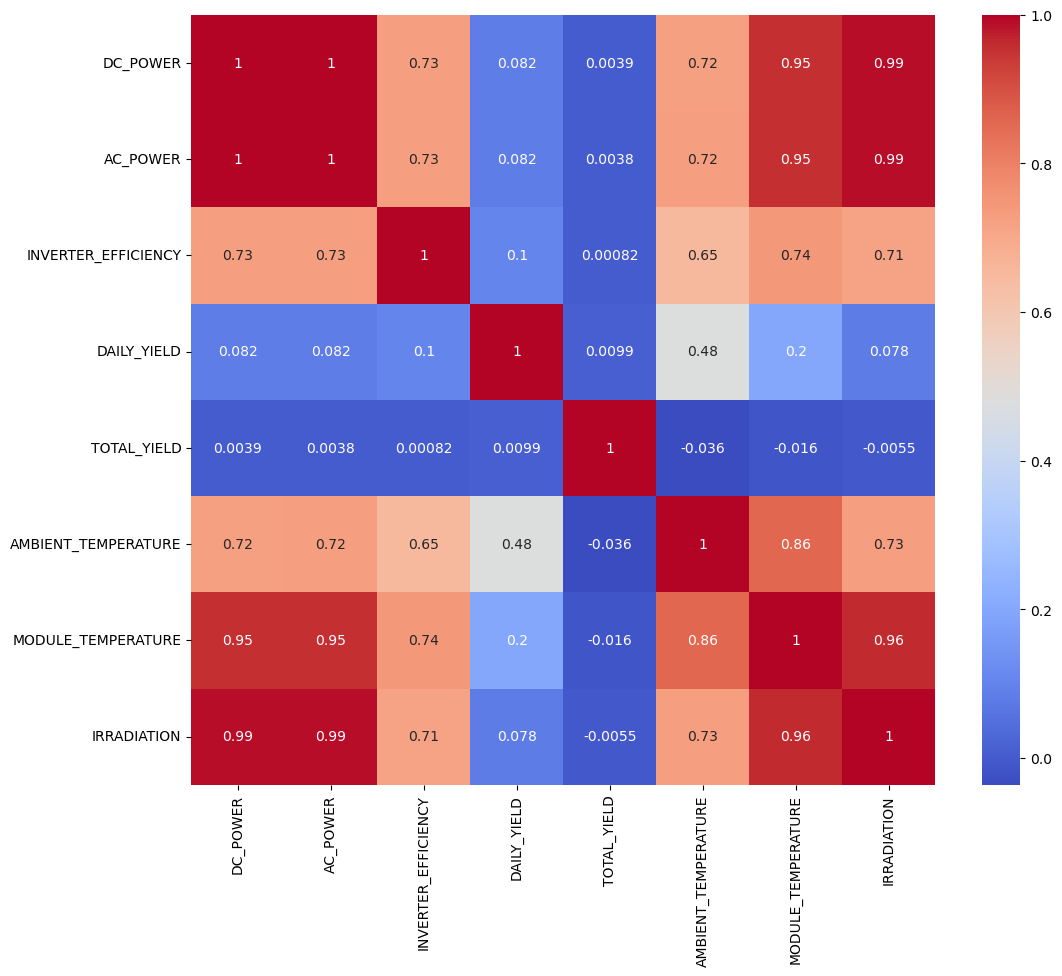

Pairs of variables with high positive correlation:
Variable 'DC_POWER' has high positive correlation with:
AC_POWER, INVERTER_EFFICIENCY, AMBIENT_TEMPERATURE, MODULE_TEMPERATURE, IRRADIATION

Variable 'AC_POWER' has high positive correlation with:
DC_POWER, INVERTER_EFFICIENCY, AMBIENT_TEMPERATURE, MODULE_TEMPERATURE, IRRADIATION

Variable 'INVERTER_EFFICIENCY' has high positive correlation with:
DC_POWER, AC_POWER, MODULE_TEMPERATURE, IRRADIATION

Variable 'AMBIENT_TEMPERATURE' has high positive correlation with:
DC_POWER, AC_POWER, MODULE_TEMPERATURE, IRRADIATION

Variable 'MODULE_TEMPERATURE' has high positive correlation with:
DC_POWER, AC_POWER, INVERTER_EFFICIENCY, AMBIENT_TEMPERATURE, IRRADIATION

Variable 'IRRADIATION' has high positive correlation with:
DC_POWER, AC_POWER, INVERTER_EFFICIENCY, AMBIENT_TEMPERATURE, MODULE_TEMPERATURE

Pairs of variables with high negative correlation:
NaN


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns like 'DATE_TIME', 'DATE', and 'TIME' from the DataFrame
numeric_columns = plant_1[['DC_POWER', 'AC_POWER', 'INVERTER_EFFICIENCY', 'DAILY_YIELD', 'TOTAL_YIELD',
                          'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]

# Calculate the correlation coefficient matrix
correlation = numeric_columns.corr()

# Set the size of the figure
plt.figure(figsize=(12, 10))

# Heatmap of correlation coefficients
sns.heatmap(correlation, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

# Set threshold for correlation coefficients
threshold = 0.7

# Extract pairs of variables with high positive correlation
high_pos_corr = correlation[correlation > threshold]
high_pos_corr = high_pos_corr[high_pos_corr < 1.0].dropna(how='all')

# Extract pairs of variables with high negative correlation
high_neg_corr = correlation[correlation < -threshold]
high_neg_corr = high_neg_corr[high_neg_corr > -1.0].dropna(how='all')

# Print pairs of variables with high positive correlation
print("Pairs of variables with high positive correlation:")
if high_pos_corr.empty:
    print("NaN")
else:
    for col in high_pos_corr.columns:
        high_corr_vars = high_pos_corr[high_pos_corr[col].notnull()].index.tolist()
        if len(high_corr_vars) > 1:
            print(f"Variable '{col}' has high positive correlation with:")
            print(", ".join(high_corr_vars))
            print()

# Print pairs of variables with high negative correlation
print("Pairs of variables with high negative correlation:")
if high_neg_corr.empty:
    print("NaN")
else:
    for col in high_neg_corr.columns:
        high_corr_vars = high_neg_corr[high_neg_corr[col].notnull()].index.tolist()
        if len(high_corr_vars) > 1:
            print(f"Variable '{col}' has high negative correlation with:")
            print(", ".join(high_corr_vars))
            print()

            

Inverter efficiency is a critical factor in solar power generation, as it directly affects the conversion of DC power from solar panels to AC power that can be fed into the grid. Understanding the performance of inverter systems and identifying any variability in their efficiency is essential for optimizing the overall power generation process.

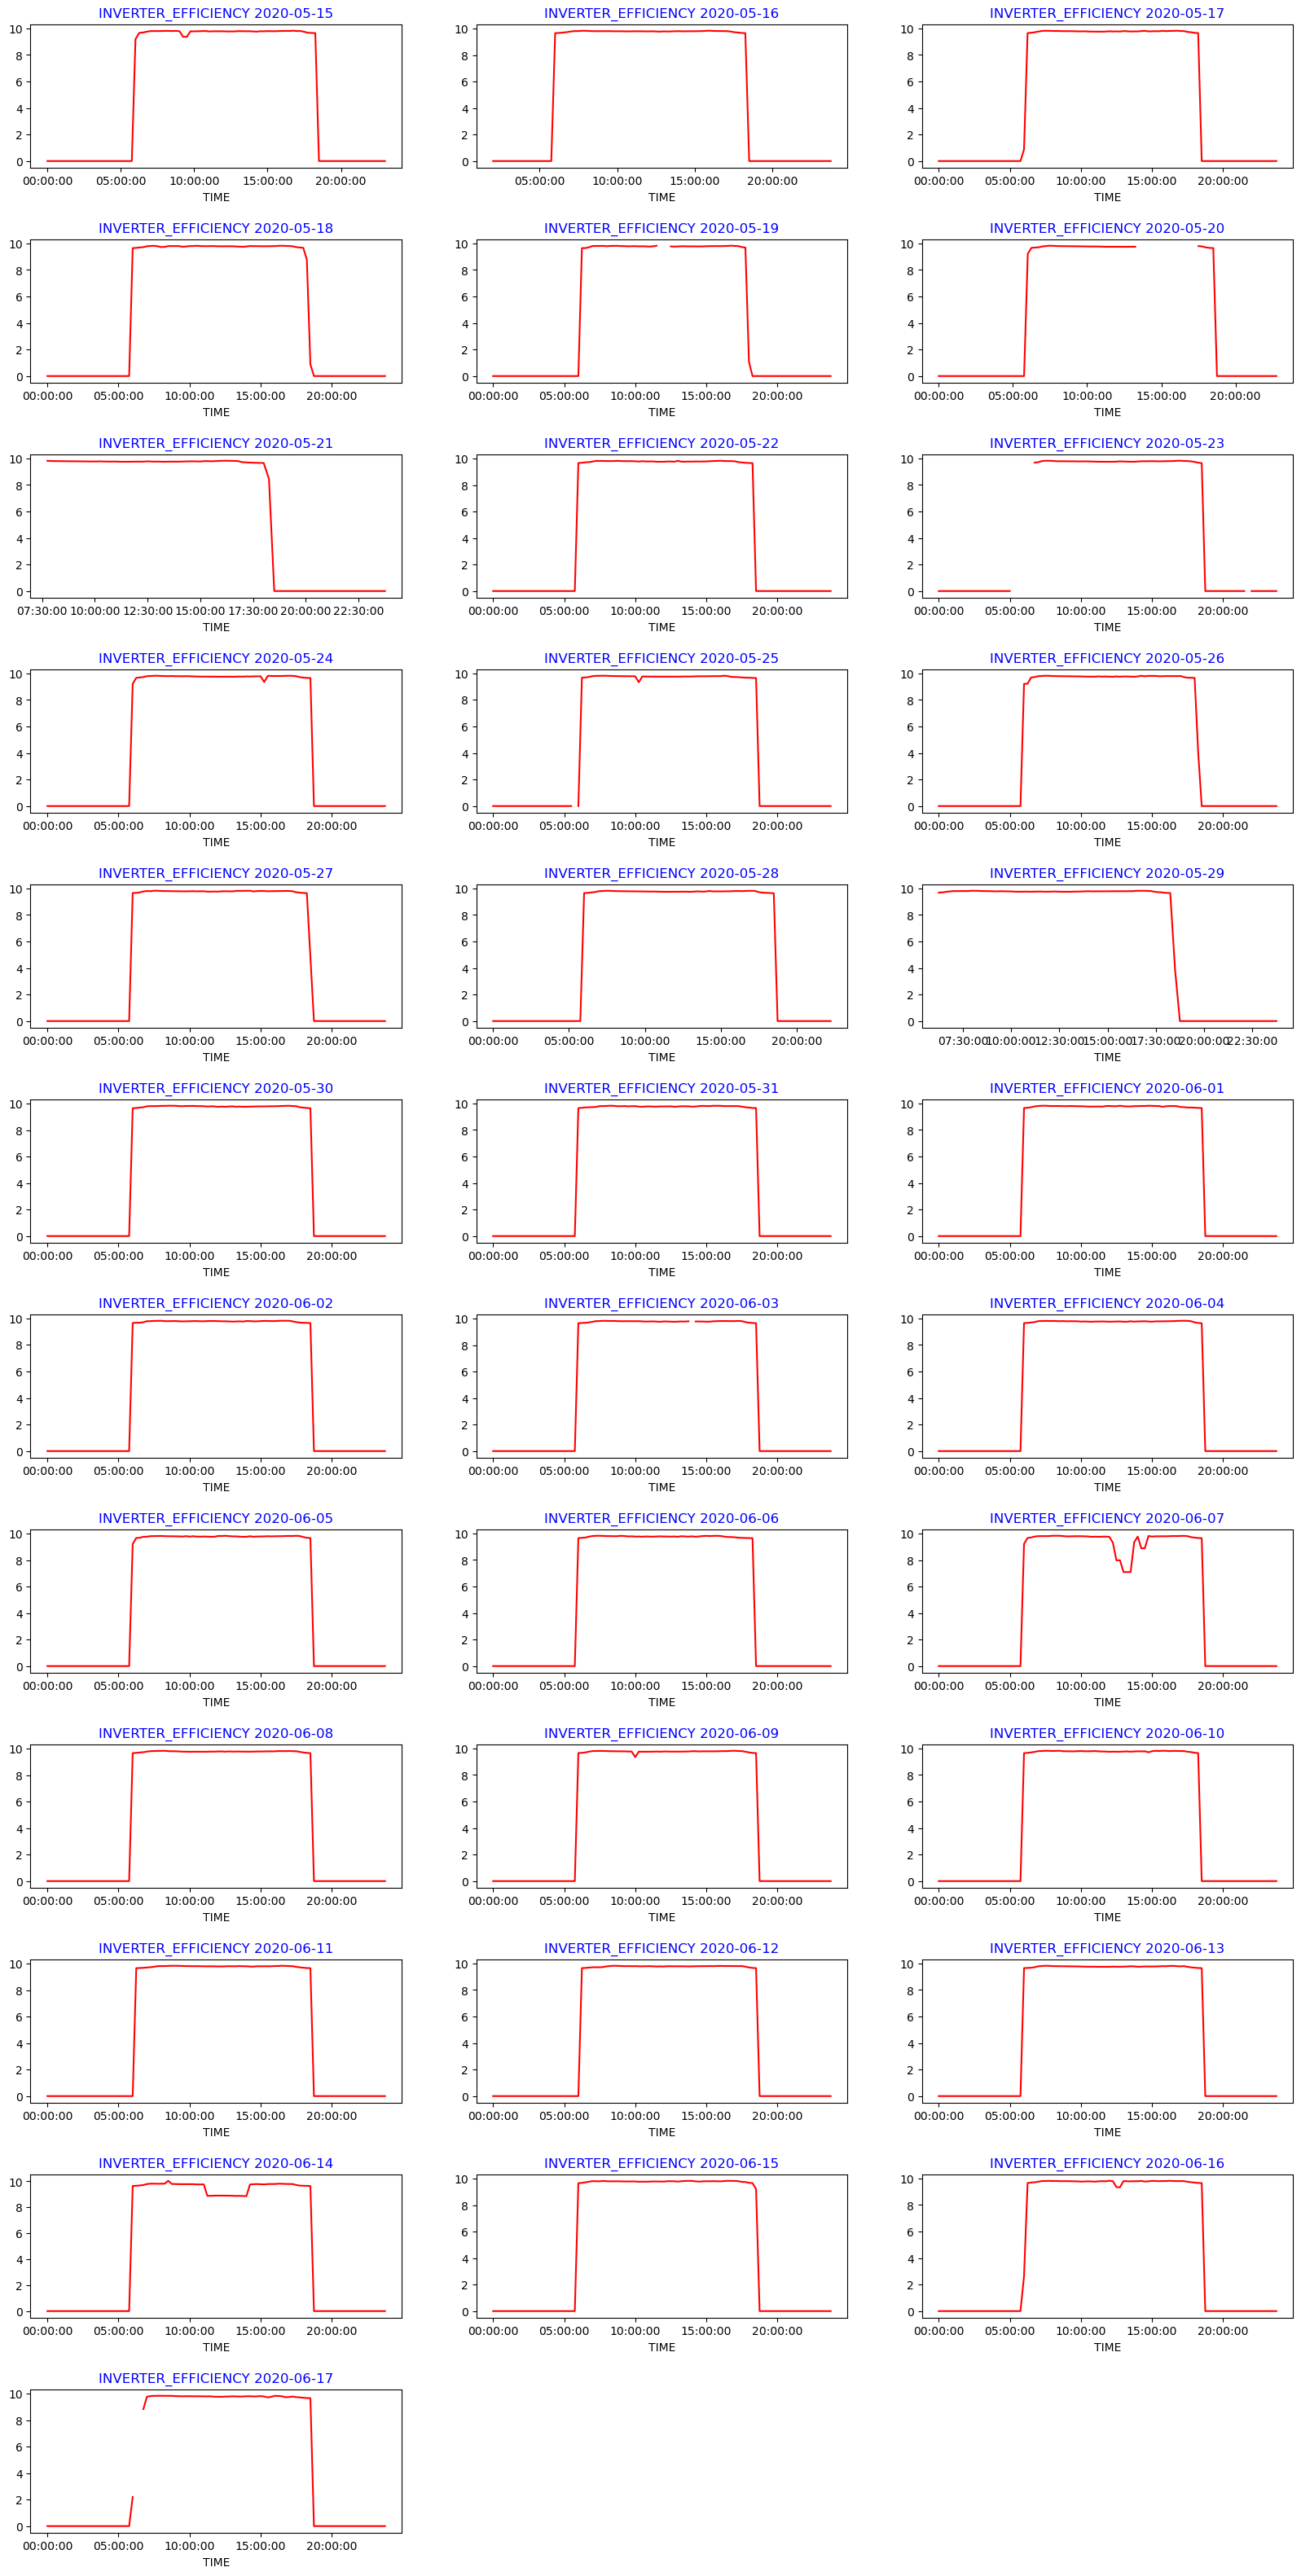

In [23]:
#  Multiple Plotting of INVERTER_EFFICIENCY generation on per day basis.

solar_efficiency = plant_1.pivot_table(values='INVERTER_EFFICIENCY', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='INVERTER_EFFICIENCY'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_efficiency, row=12, col=3)

The analysis of the inverter efficiency data revealed noticeable fluctuations on a per-day basis. Several days showed significant variability in inverter efficiency, with fluctuations ranging from low to high levels.Only on 2020-06-17 showed the inverter efficiency stability. The variability was observed across different time per day, indicating that inverter efficiency was not consistent and could be influenced by various factors.

The observed variability in inverter efficiency could be attributed to several factors, such as changing weather conditions, variations in solar irradiation, fluctuations in ambient temperature, equipment performance, and operational conditions. It is crucial for solar power plant operators to monitor and analyze the inverter efficiency data to identify any patterns or trends that may impact power generation performance. 

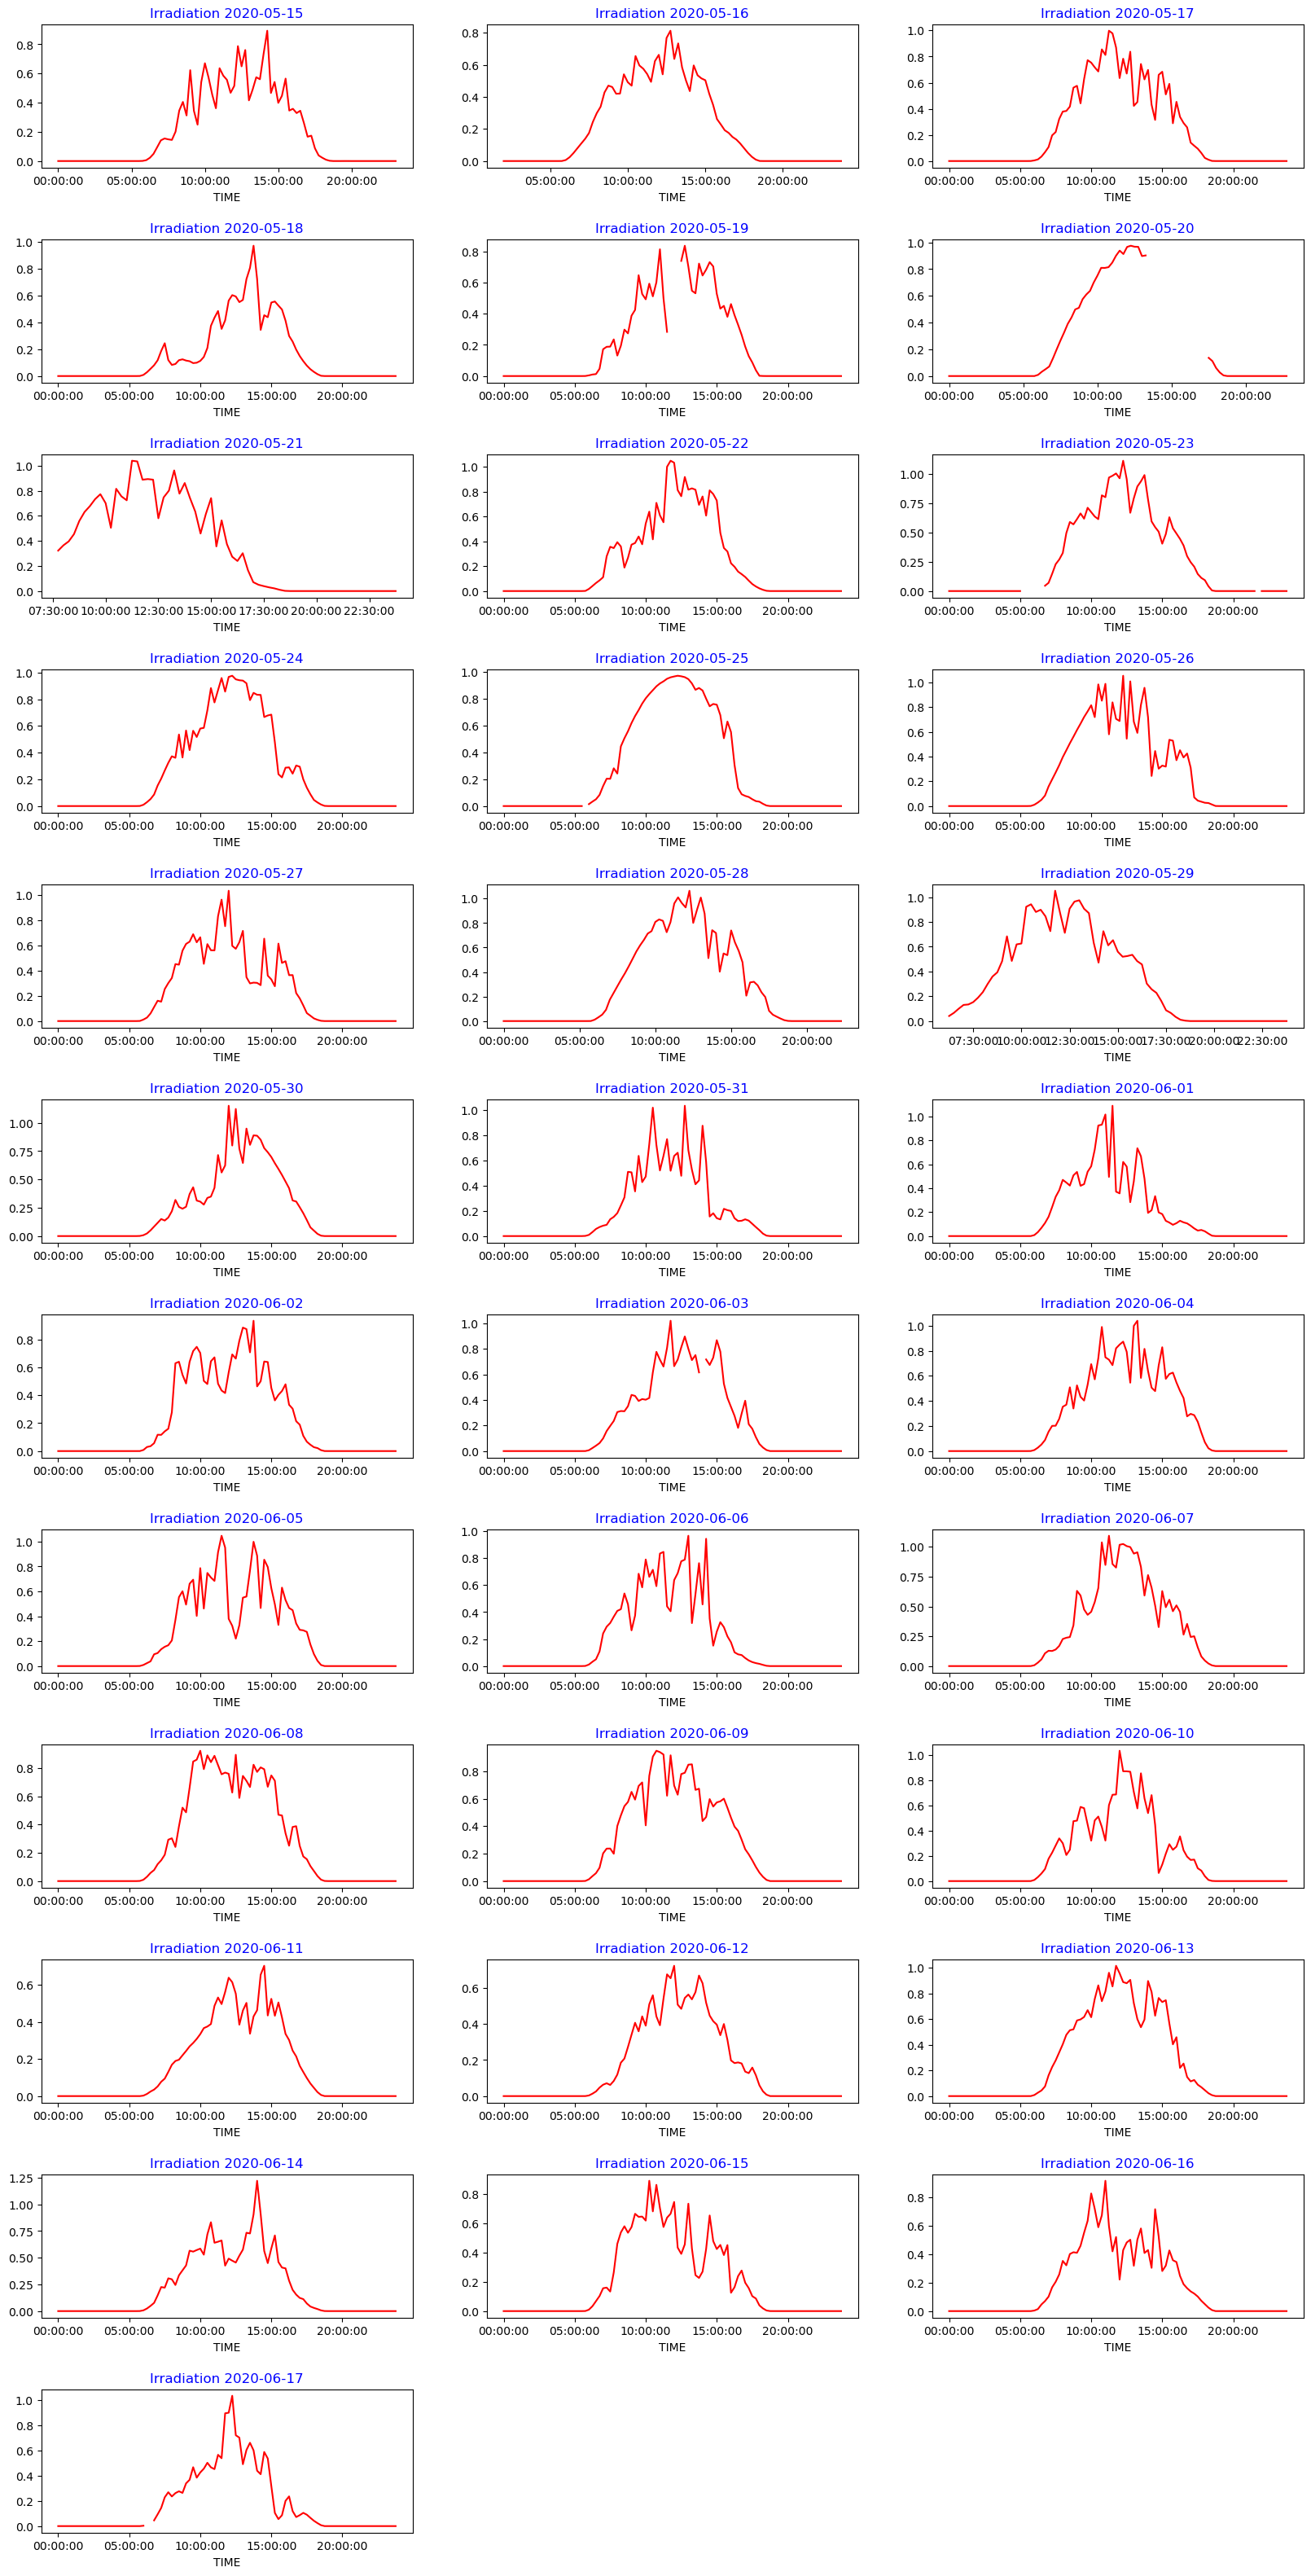

In [24]:
# Multiple Plotting of IRRADIATION generation on per day basis.

solar_irradiation = plant_1.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='Irradiation'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_irradiation, row=12, col=3)

Inverter Efficiency, which measures the conversion efficiency of DC power from PV panels to AC power for grid consumption, is a crucial performance metric in solar power plants. Irradiation, on the other hand, represents the intensity of sunlight reaching the PV panels and can impact the overall energy generation.

The analysis indicated that Inverter Efficiency and Irradiation do not exhibit a direct and consistent relationship. While it was expected that higher levels of Irradiation would result in improved Inverter Efficiency, the data revealed that this was not always the case. Some days with sufficient Irradiation levels showed fluctuations in Inverter Efficiency, indicating that other factors may be influencing the performance of the inverters.

This suggests that there may be other variables that impact the Inverter Efficiency, such as temperature, module condition, or other operational factors. Further investigation is warranted to identify these variables and their effects on Inverter Efficiency in order to optimize the performance of the solar power plant.

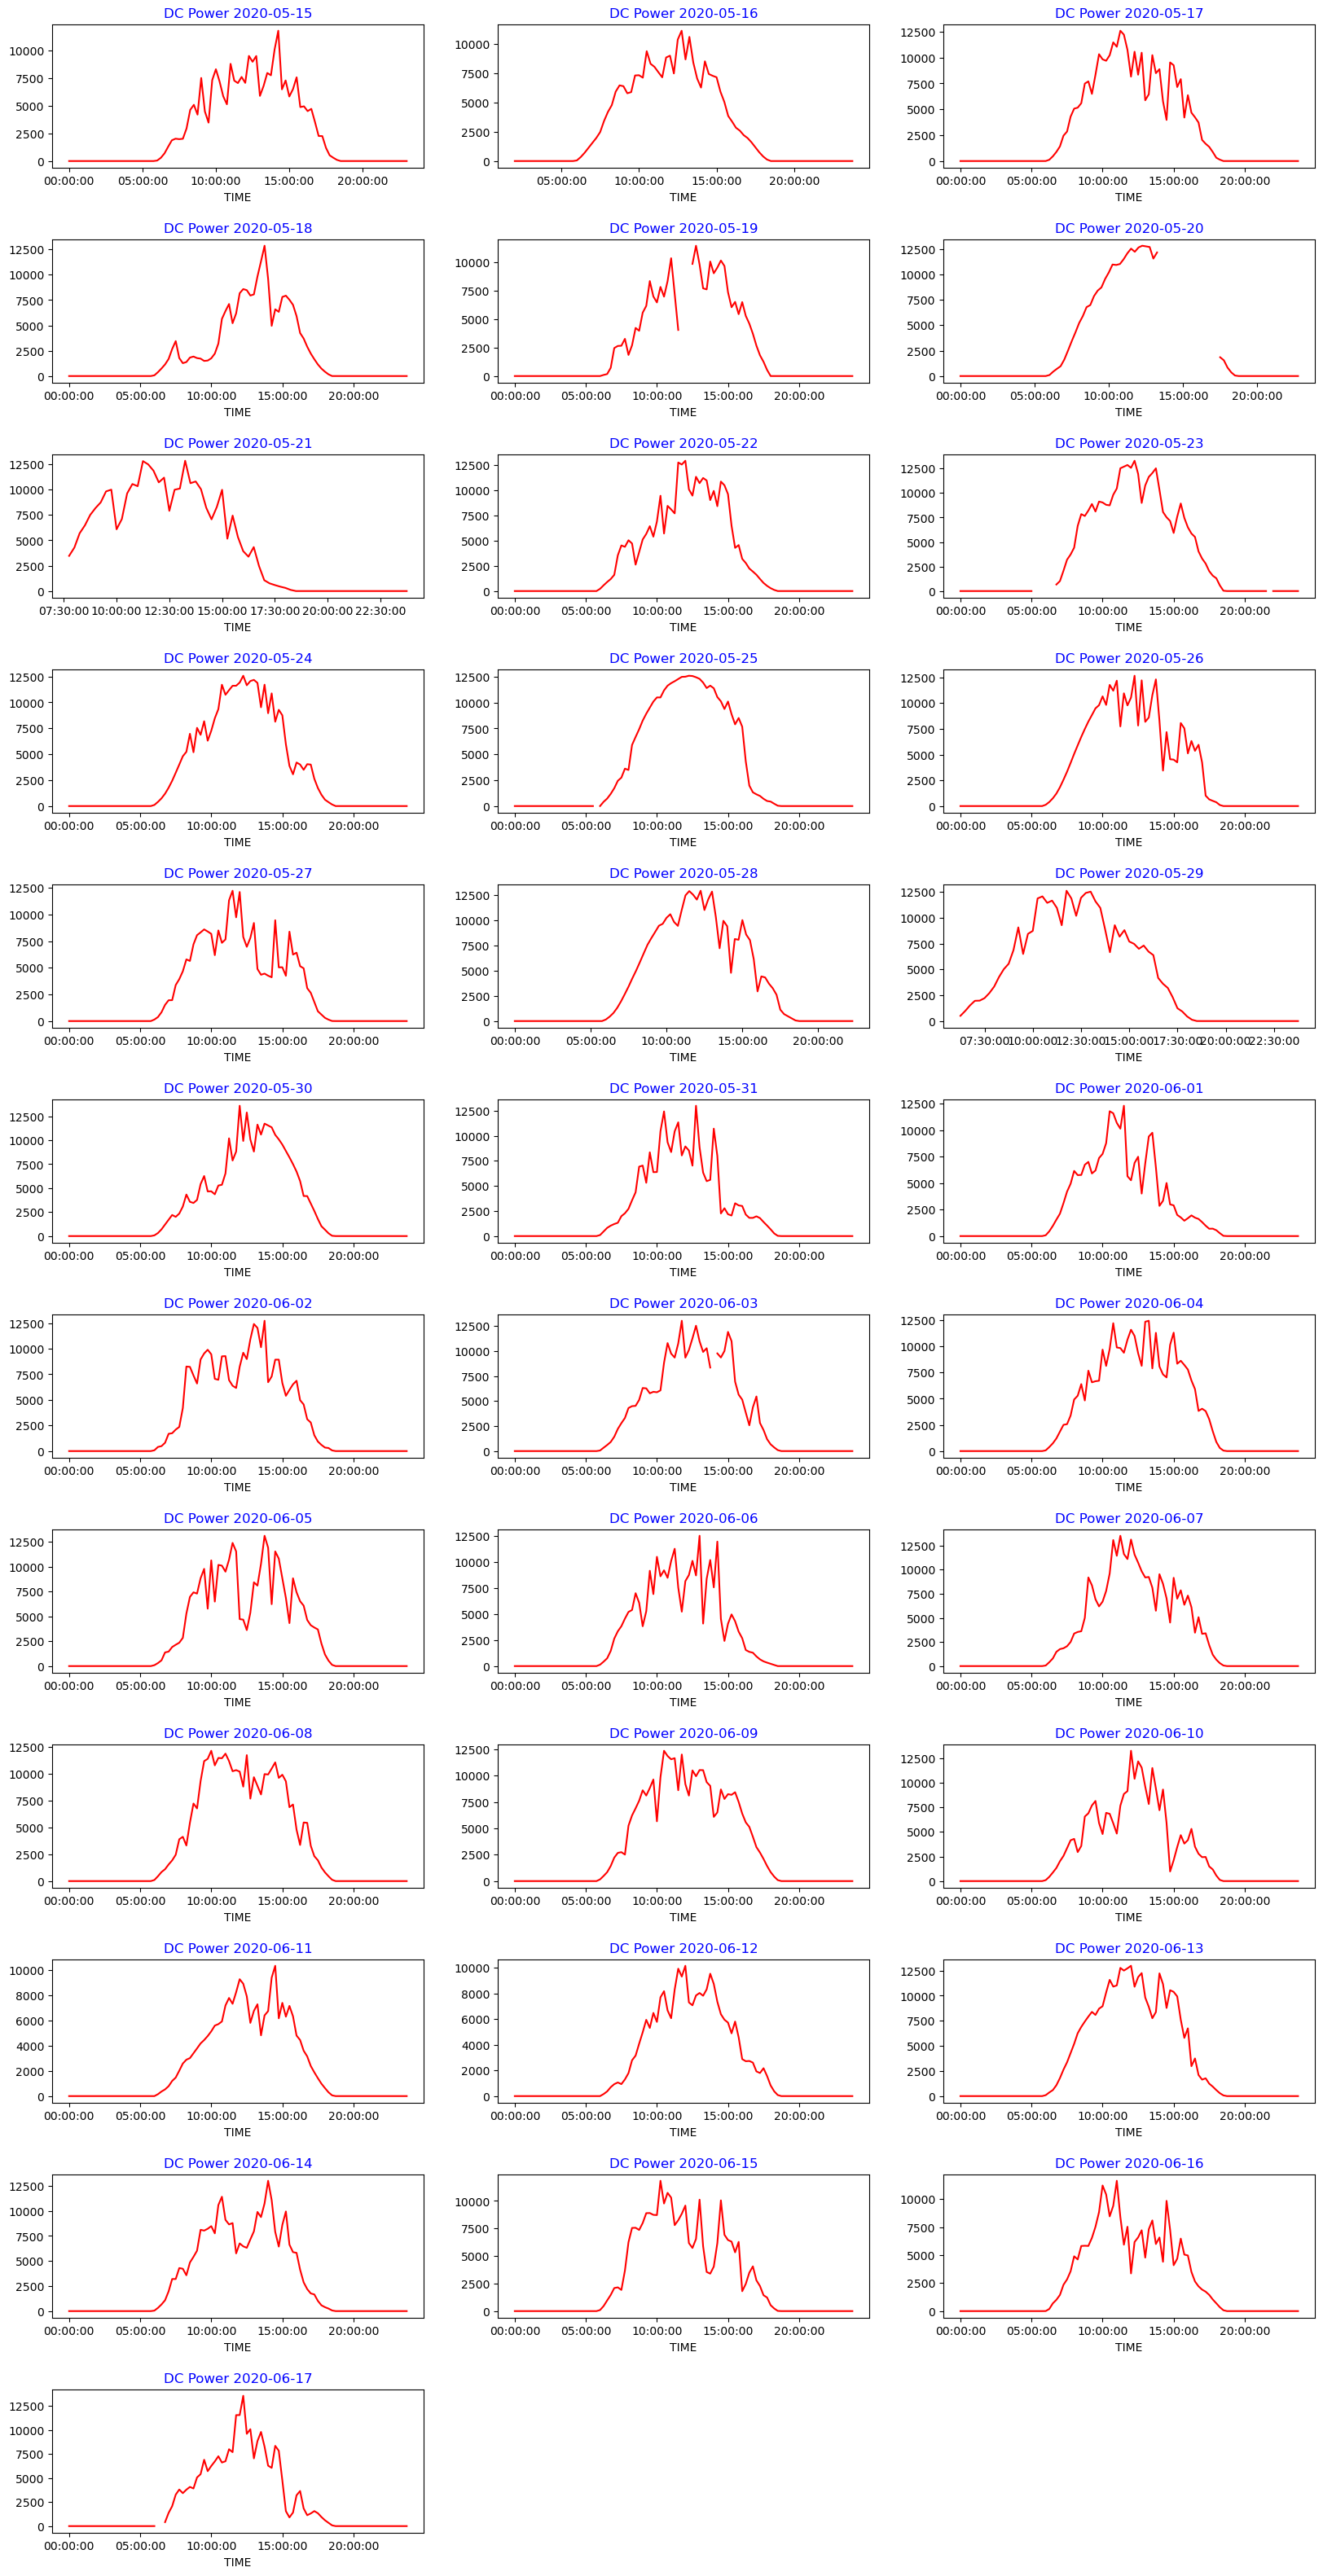

In [25]:
#  Multiple Plotting of DC_POWER generation on per day basis.

solar_dc = plant_1.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_dc, row=12, col=3)

Based on this,  'INVERTER_EFFICIENCY' does not appear to be significantly affected by 'IRRADIATION', based on the scatter plot and other visualizations we generated.

However, we observed that 'DC_POWER' has a noticeable impact on 'INVERTER_EFFICIENCY'. As 'DC_POWER' increases, the 'INVERTER_EFFICIENCY' tends to increase as well, indicating a positive relationship between these two variables. 

Furthermore, we also noted that 'IRRADIATION' does have an effect on 'DC_POWER', as higher 'IRRADIATION' levels tend to result in higher 'DC_POWER' generation. 

This suggests that while 'IRRADIATION' indirectly impacts 'INVERTER_EFFICIENCY' through its effect on 'DC_POWER', it does not have a direct impact on 'INVERTER_EFFICIENCY'

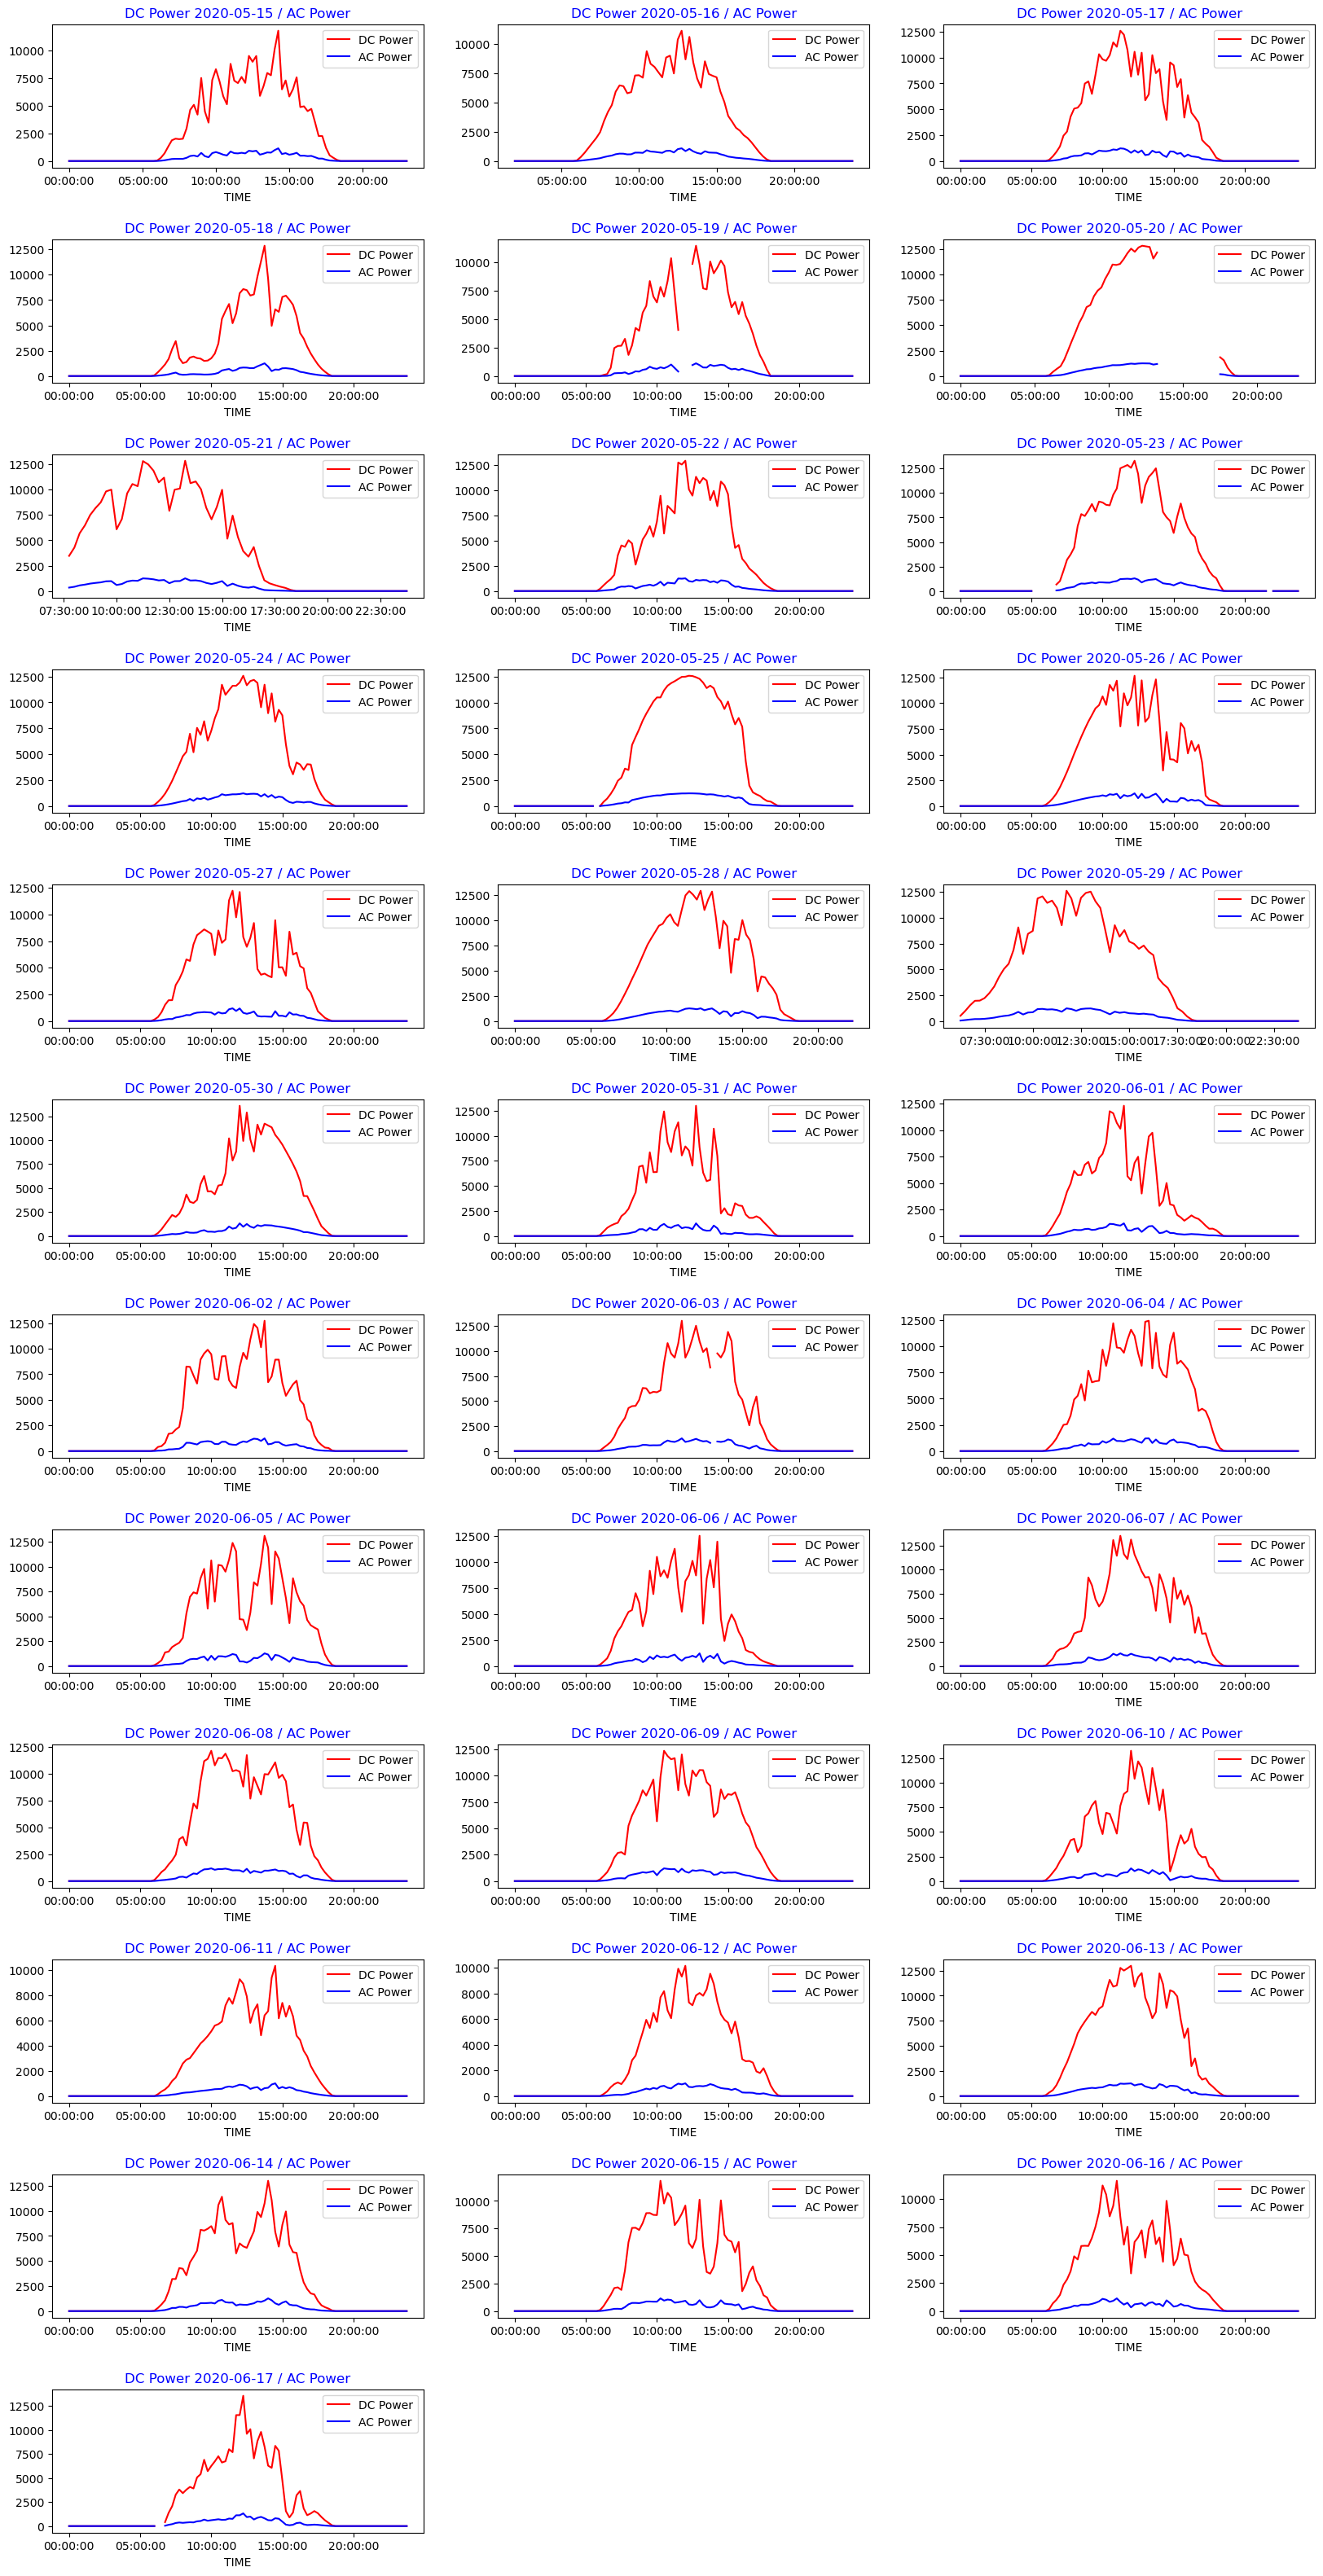

In [26]:
solar_dc = plant_1.pivot_table(values='DC_POWER', index='TIME', columns='DATE')
solar_ac = plant_1.pivot_table(values='AC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data_dc=None, data_ac=None, row=None, col=None, title_dc='DC Power', title_ac='AC Power'):
    cols_dc = data_dc.columns
    cols_ac = data_ac.columns
    gp = plt.figure(figsize=(20, 40))
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols_dc) + 1):
        ax = gp.add_subplot(row, col, i)
        data_dc[cols_dc[i - 1]].plot(ax=ax, color='red', label='DC Power')
        data_ac[cols_ac[i - 1]].plot(ax=ax, color='blue', label='AC Power')
        ax.set_title('{} {} / {}'.format(title_dc, cols_dc[i - 1], title_ac), color='blue')
        ax.legend()

Daywise_plot(data_dc=solar_dc, data_ac=solar_ac, row=12, col=3, title_dc='DC Power', title_ac='AC Power')


In [27]:
low_efficiency = plant_1[(plant_1['INVERTER_EFFICIENCY'] < 80) & (plant_1['TIME_OF_DAY'] == 'DAY')]
if low_efficiency.empty:
    print("No row effected")
else:
    low_efficiency.sample(10)


No row effected


In [28]:
low_efficiency = plant_1[(plant_1['INVERTER_EFFICIENCY'] < 80) & (plant_1['AC_POWER'] != 0 ) & (plant_1['DC_POWER'] != 0)]
if low_efficiency.empty:
    print("No row effected")
else:
    low_efficiency.sample(10)


It can be concluded that the inverter appears to be functioning well, as no rows were found to be affected by low inverter efficiency during the day. It seems also there were no row affected due to DC_POWER and AC_POWER are not zero values and INVERTER_EFFICIENCY below than 80%. 

Based on the analysis of the available data, it can be inferred that the inverter is functioning properly as no rows were found to be affected by low inverter efficiency. The observed fluctuations in inverter efficiency are likely attributed to changes in irradiation levels affecting the DC_POWER generation. Further analysis of other factors such as irradiation, DC_POWER, and other environmental conditions may be required to gain a more comprehensive understanding of the performance of the solar power plant.

As conclusions,

The performance of a solar power plant is influenced by various factors, including irradiation levels, DC_POWER generation, AC_POWER generation, and inverter efficiency. It was observed that changes in irradiation levels affect the DC_POWER generation, which in turn impacts the AC_POWER generation and inverter efficiency. Higher irradiation levels result in increased DC_POWER and AC_POWER generation, leading to higher inverter efficiency. Conversely, lower irradiation levels lead to reduced DC_POWER and AC_POWER generation, resulting in lower inverter efficiency. This highlights the critical role of irradiation levels in determining the performance of a solar power plant and the need for monitoring and optimization of these factors for optimal plant performance.

----- SKEWNESS ------------
DC_POWER skewness = 0.96
AC_POWER skewness = 0.95
INVERTER_EFFICIENCY skewness = -0.14
DAILY_YIELD skewness = 0.28
TOTAL_YIELD skewness = -0.42
AMBIENT_TEMPERATURE skewness = 0.69
MODULE_TEMPERATURE skewness = 0.84
IRRADIATION skewness = 1.03
---------------------------


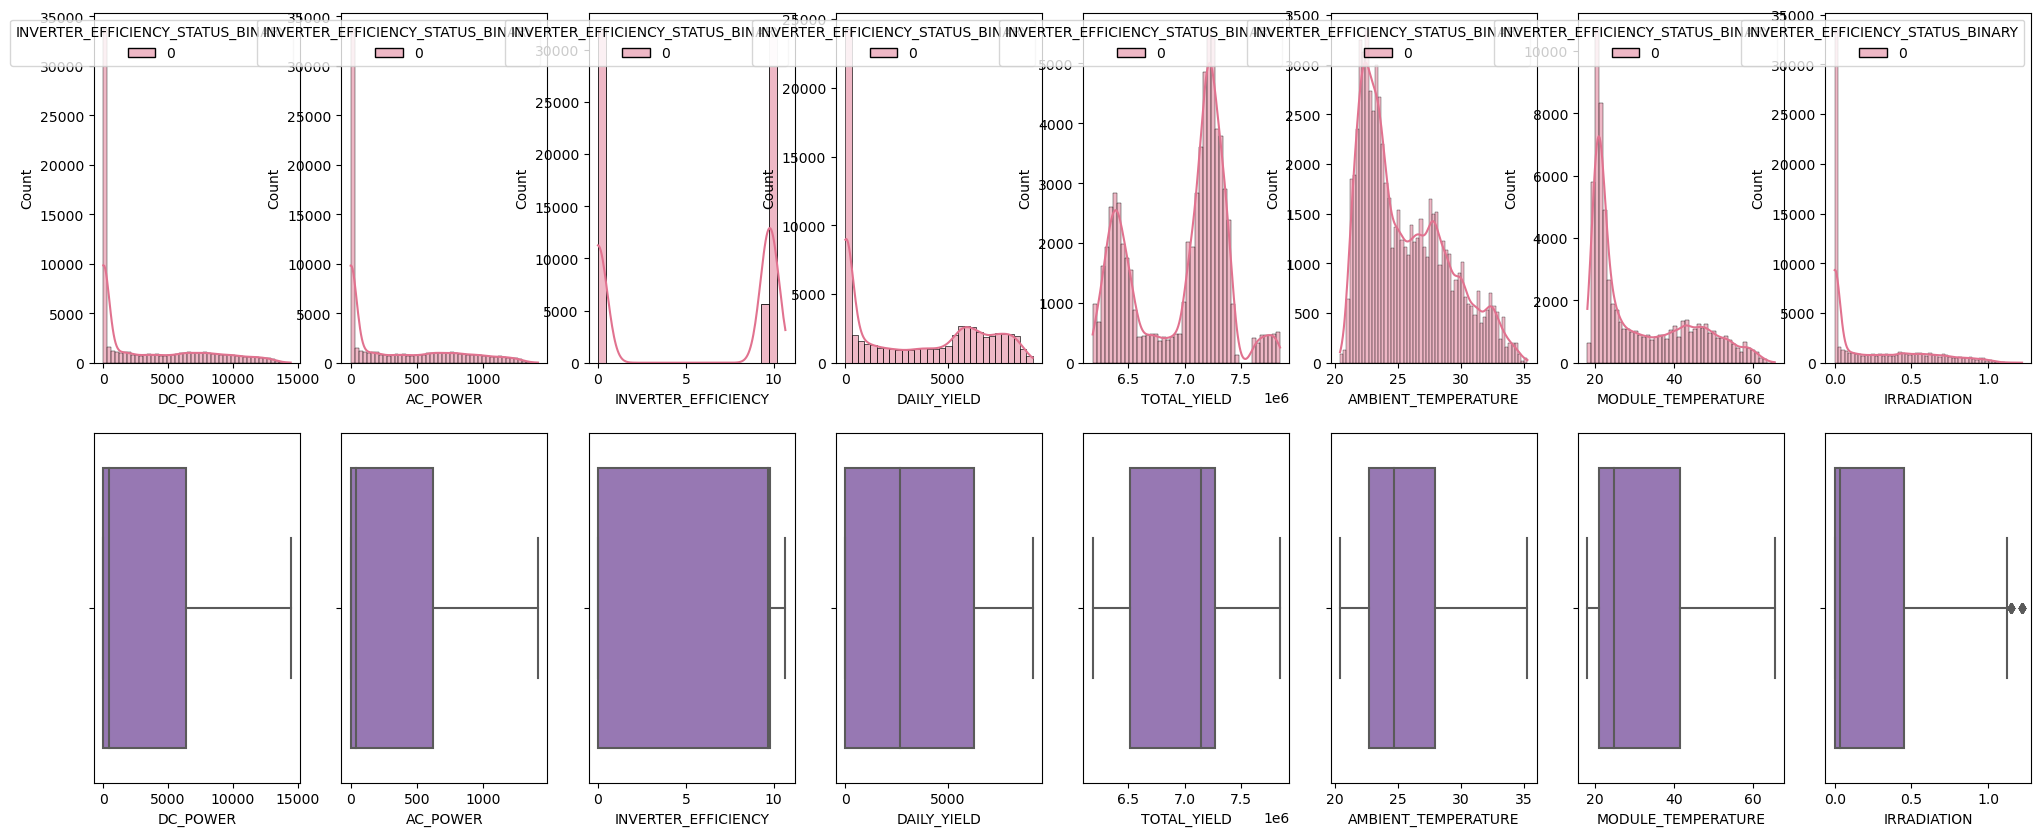

In [29]:
print('----- SKEWNESS ------------')
fig, axes = plt.subplots(2, 8, figsize=[25,10])
j = 0
colors = ['#E1728F', '#409E7D']

for i in ['DC_POWER', 'AC_POWER','INVERTER_EFFICIENCY', 'DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION'][:8]:
    sns.histplot(data=plant_1, x=i, kde=True, ax=axes[0,j], hue='INVERTER_EFFICIENCY_STATUS_BINARY', palette=colors)
    sns.boxplot(data=plant_1, x=i, ax=axes[1,j], palette=['#976EBD'])
    j+=1
    print('{} skewness = {}'.format(i, round(plant_1[i].skew(), 2)))
print('---------------------------')

# ORDINAL ENCODING

In [30]:
from sklearn.preprocessing import LabelEncoder

data_scaled = plant_1.copy()

# Create a LabelEncoder object
encoder = LabelEncoder()

# Select the categorical columns to encode
categorical_columns = data_scaled.select_dtypes(include=['object']).columns

# Encode the categorical columns
data_scaled[categorical_columns] = data_scaled[categorical_columns].apply(encoder.fit_transform)

#  Scaling Data

In [31]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Select the columns to scale
columns_to_scale = ['DC_POWER', 'AC_POWER','MODULE_TEMPERATURE','IRRADIATION']

# Create a RobustScaler object
scaler = RobustScaler()

# Fit the scaler to the data and transform the data
data_scaled[columns_to_scale] = scaler.fit_transform(plant_1[columns_to_scale])

In [32]:
# Select the columns to scale
cols_to_scale = ['INVERTER_EFFICIENCY', 'DAILY_YIELD', 'TOTAL_YIELD','AMBIENT_TEMPERATURE']

# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data
scaler.fit(data_scaled[cols_to_scale])

# Transform the data
data_scaled[cols_to_scale] = scaler.transform(data_scaled[cols_to_scale])

In [33]:
data_scaled.sample(10)

,DATE_TIME,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,...,DC_POWER,AC_POWER,INVERTER_EFFICIENCY,INVERTER_EFFICIENCY_STATUS,INVERTER_EFFICIENCY_STATUS_BINARY,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
58044,2020-06-12 21:30:00,28,86,12,6,24,14,30,1290,28,...,-0.067328,-0.066473,0.000000,0,0,0.632326,0.634410,0.144025,-0.188503,-0.069512
40859,2020-06-04 16:30:00,20,66,4,6,23,8,30,990,20,...,0.848417,0.849602,0.919348,0,0,0.836361,0.709293,0.526983,0.727410,0.860733
19494,2020-05-25 02:45:00,10,11,25,5,22,12,45,165,10,...,-0.067328,-0.066473,0.000000,0,0,0.000000,0.641914,0.213161,-0.115176,-0.069512
35521,2020-06-02 03:15:00,18,13,2,6,23,17,15,195,18,...,-0.067328,-0.066473,0.000000,0,0,0.000000,0.153321,0.053978,-0.263259,-0.069512
20512,2020-05-25 15:00:00,10,60,25,5,22,7,0,900,10,...,1.576003,1.573417,0.917092,0,0,0.842940,0.635393,0.941437,1.591095,1.590074
51158,2020-06-09 15:15:00,25,61,9,6,24,7,15,915,25,...,1.200470,1.200263,0.918247,0,0,0.735785,0.622964,0.686286,0.973650,1.209057
43737,2020-06-06 02:15:00,22,9,6,6,23,12,15,135,22,...,-0.067328,-0.066473,0.000000,0,0,0.000000,0.714241,0.106209,-0.257052,-0.069512
63091,2020-06-15 06:45:00,31,27,15,6,25,20,45,405,31,...,0.162865,0.162878,0.915655,0,0,0.005862,0.694082,0.128847,-0.038134,0.156270
3003,2020-05-16 13:45:00,1,55,16,5,20,5,45,825,1,...,1.066073,1.066375,0.918568,0,0,0.487409,0.520624,0.738361,1.092905,1.034939
48351,2020-06-08 07:15:00,24,29,8,6,24,21,15,435,24,...,0.219101,0.220127,0.919567,0,0,0.013014,0.663879,0.137380,0.018194,0.253976


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = data_scaled.drop(['DATE_TIME', 'DATE', 'TIME','DAY','MONTH','WEEK','HOURS','MINUTES','TOTAL MINUTES PASS','DATE_STRING','TIME_OF_DAY', 'SOURCE_KEY','INVERTER_EFFICIENCY','INVERTER_EFFICIENCY_STATUS','INVERTER_EFFICIENCY_STATUS_BINARY'], axis=1)
y = data_scaled['INVERTER_EFFICIENCY_STATUS_BINARY']

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=.5,random_state=123)

In [36]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit the classifier to the data
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# View the results
print(models)

 38%|███████████████████████████████                                                   | 11/29 [00:02<00:05,  3.47it/s]